In [1]:
library(gprofiler2)
library(openxlsx)

In [2]:
modules <- read.csv("../../results/2022-08-22-dream-modules/dream-modules-AD-GWAS-AD-genesets.csv", stringsAsFactors = FALSE)
colnames(modules)[1] <- "moduleName"
modules <- modules[order(modules$empPvalue), ]
modules <- modules[modules$empPvalue < 0.05, ]
modules <- modules[complete.cases(modules), ] # remove NAs
query <- sapply(modules$Genes, function(m) strsplit(m, " "))
names(query) <- modules$moduleName

In [3]:
enrichment <- gost(query = query, multi_query = TRUE)

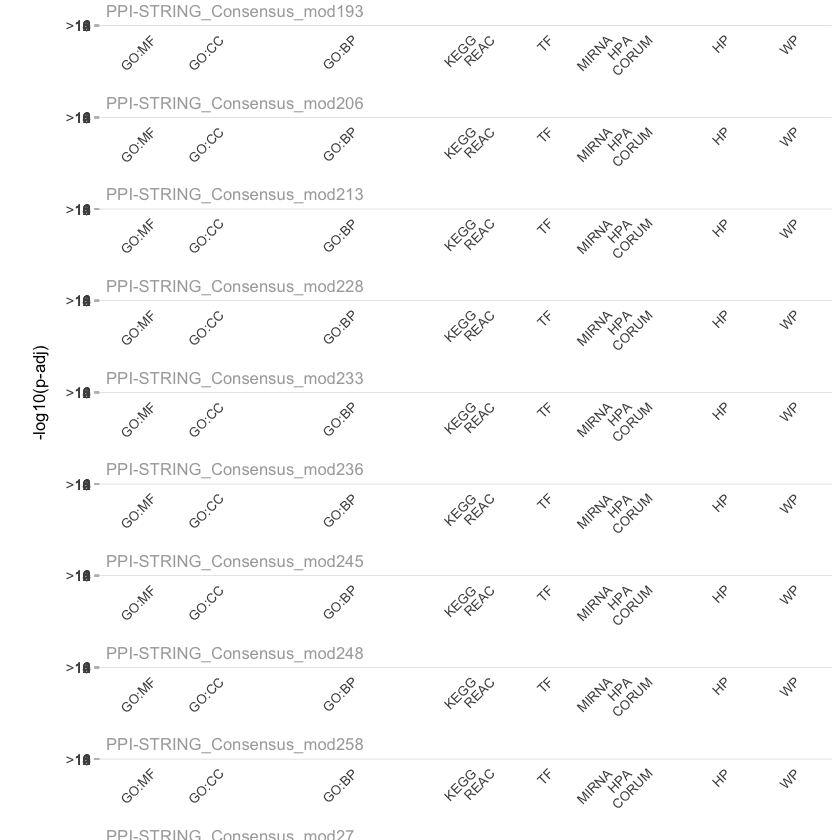

In [4]:
gostplot(enrichment, capped = TRUE, interactive = FALSE)

In [5]:
termVarNames <- c("term_id", "source", "term_size", "term_name")
d1 <- enrichment$result[termVarNames]
u <- unlist(enrichment$result$p_values)
m <- t(matrix(u, nrow = length(query), ncol = length(enrichment$result$term_id)))
d2 <- as.data.frame(m)
names(d2) <- modules$moduleName
results <- cbind(d1, d2)
write.csv(results, "../../results/2022-08-31-dream-modules-gprofiler/results.csv")

In [6]:
head(results)

,term_id,source,term_size,term_name,PPI-STRING_Consensus_mod272,PPI-STRING_Consensus_mod248,PPI-STRING_Consensus_mod191,PPI-STRING_Consensus_mod142,PPI-STRING_Consensus_mod328,PPI-STRING_Consensus_mod165,⋯,PPI-STRING_Consensus_mod258,PPI-STRING_Consensus_mod140,PPI-STRING_Consensus_mod83,PPI-STRING_Consensus_mod233,PPI-STRING_Consensus_mod17,PPI-STRING_Consensus_mod146,PPI-STRING_Consensus_mod82,PPI-STRING_Consensus_mod193,PPI-STRING_Consensus_mod308,PPI-STRING_Consensus_mod213
,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,REAC:R-HSA-350562,REAC,51,Regulation of ornithine decarboxylase (ODC),1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
2,GO:0000502,GO:CC,66,proteasome complex,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
3,REAC:R-HSA-351202,REAC,58,Metabolism of polyamines,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
4,GO:1905369,GO:CC,86,endopeptidase complex,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
5,REAC:R-HSA-211733,REAC,50,Regulation of activated PAK-2p34 by proteasome mediated degradation,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
6,REAC:R-HSA-1236978,REAC,50,Cross-presentation of soluble exogenous antigens (endosomes),1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1


In [7]:
wb <- createWorkbook()
extract_module <- function(moduleName = "PPI-STRING_Consensus_mod272") {
    df <- subset(results, select = c(termVarNames, moduleName))
    df <- df[order(df[[moduleName]]), ]
    names(df)[length(df)] <- "enrichment_pval"
    addWorksheet(wb, moduleName)
    setColWidths(wb, moduleName, cols = length(df) - 1, widths = 50)
    freezePane(wb, moduleName, firstActiveRow = 2)
    writeData(wb, moduleName, df, startCol = 1, startRow = 1, rowNames = FALSE)
    return(df)
}

results.l <- lapply(modules$moduleName, extract_module)

fpath <- "../../results/2022-08-31-dream-modules-gprofiler/dream-modules-enrichments.xlsx"
saveWorkbook(wb, fpath, overwrite = TRUE)